# Welcome to Cyberbullying Detection Model
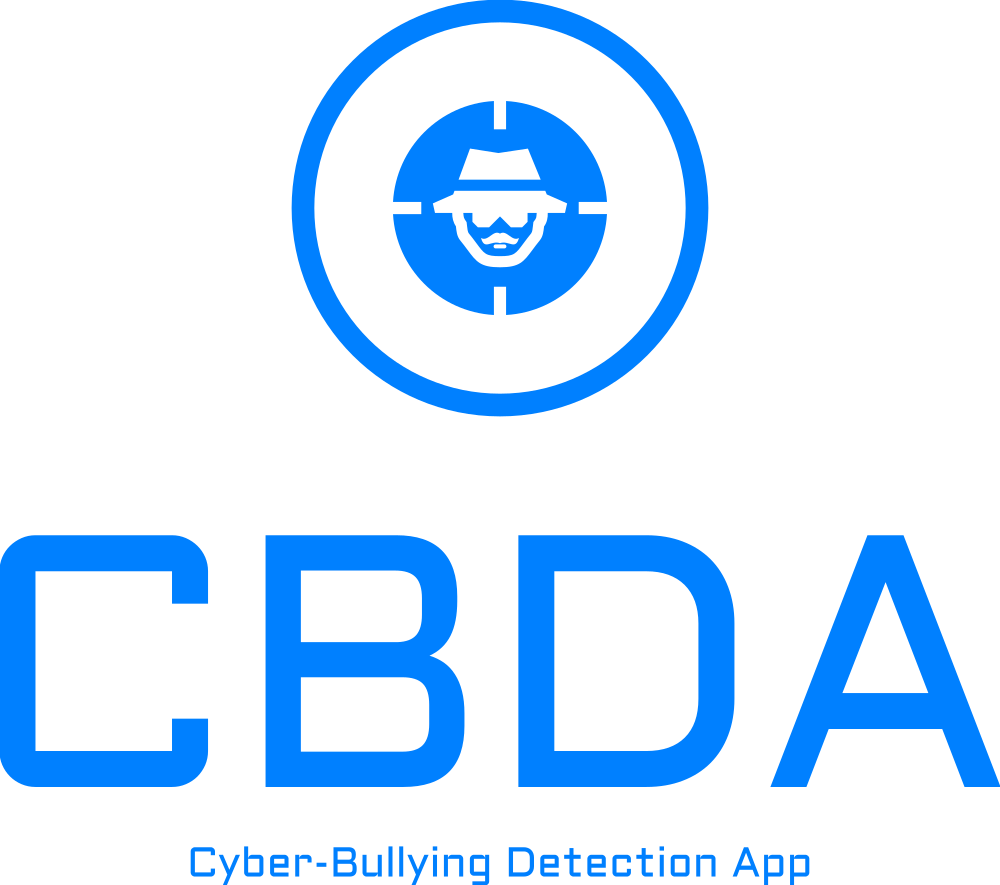

# Importing Required Libraries 
Numpy For Numerical Scientific Computing |
Pandas For Data Manipulations |
Tweepy For data Fetch From Twitter Api |
VaderSentiment For Finding The Polarity Scores of words |
nltk For wordnet and pre proprocessing the text |


In [1]:
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from collections import Counter
import re
from matplotlib import pyplot as plt
import json
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords


# To Scrape the Data From Twitter Api As per the hashtag and Date

def scrape(words, date_since, numtweet): 
    print(1)
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text',  'hashtags']) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en",since=date_since, tweet_mode='extended').items(numtweet) 

    print(tweets)
    
    # for i in tweets:
    # print(i)
    list_tweets = [tweet for tweet in tweets] 
 
    i = 1  
      
    for tweet in list_tweets:
    
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
    
        try: 
            text = tweet.retweeted_status.full_text
        
        except AttributeError: 
            text = tweet.full_text
            
        hashtext = list() 
        for j in range(0, len(hashtags)):
            
            hashtext.append(hashtags[j]['text']) 
    
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 

        # Function call to print tweet data on screen 
    # print(tweetdata(i, ith_tweet))
        
        i = i+1
    
    filename = 'scraped_data.csv'
    
    db

    db.to_csv(filename) 
    print("Done----------")

if __name__ == '__main__': 
    #Storing Twitter Keys in variables
    #consumer_key = 'AaBb3BBnAQOHtqjuEtaq0SXOY'
    #consumer_secret = 'IZkGlvcsiqevFPBO7E0Kmo466PVQlD95AVcHyFAsGb8GtZEfKy'
    #access_key = '1321309664772907008-pRJLxNzx1UddghW6GRfcUmYYbwbwYY'
    #access_secret = 'p0jDJk4C77p4gInXpa7KrOZzJEhTym2myFjTiZ1afRoWj'
    
    
    consumer_key = 'hC02vDfkSX1IBYOZPRjCpgXCm'
    consumer_secret = 'Pm080QkpceLW3Q1RKBRIIZDI3Nn1khMogxUeB2KyJjFqIamr6i'
    access_key = '1321309664772907008-NT3w9KrGuT4BzsCKHdiFEgq8HamZ9B'
    access_secret = 'fkudHFKdUlbkaGLUwnNGeEU2MxpPVKC1nqkEGpVmAqk3S'
    
    # consumer_key = '5bloZwJga9Xu8f7FHvjizoVnz'
    # consumer_secret = 'ZmjIXjrLn7IH3yFO86uoU1WoeY4AsE3Q10ZbjDa7DIZOW5V2EL'
    # access_key = '2960397948-c81vy3mf6lG3rb3tafDKEki0J3RyyYAindujobw'
    # access_secret = 'dNZVRIy7EAKaJm1HN2lXY9QS8ZGspOYY248jXrXsdE01Z'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 500  
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 


# Loading The Contractions.json For Conversion Like are 
  "ain't": "am not" |
  "aren't": "are not"

In [2]:

with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

# Reading The Scraped Tweets Which Extracted From The Api

In [3]:
import pandas as pd
data= pd.read_csv("scraped_tweets2.csv")
data

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,pendamite_tapan,NaN,NaN,97,454,147065,154,The results of Assam municipal elections clear...,[]
1,1,igrms,IGRMS- National Museum of Mankind,"Bhopal, Madhya Pradesh, India",3481,2049,16266,1,@kishanreddybjp @MinOfCultureGoI @M_Lekhi @arj...,[]
2,2,levi129867,adapt or perish,अखंड भारतवर्ष,708,281,8954,0,Tomorrow will be day which might decide BJP's ...,"['YogiAdityanath', 'NarendraModi', 'BJP', 'Utt..."
3,3,GauravlaluKumar,Gaurav Kumar@The COMMERCE Teacher@Lalu Thakur,"Kanpur, India",1749,1181,32743,341,BJP's clean sweep in the municipal elections o...,[]
4,4,OthumanSyed,NaN,NaN,2,4,355,0,@narendramodi @BJP4Assam Great victory. Credit...,[]
...,...,...,...,...,...,...,...,...,...,...
495,495,ashutosh3455,"Semi Qualified Chartered Accountant, Income Ta...","Deoghar, Jharkhand",449,851,49032,75,Hon'ble PM Shri @narendramodi Ji's enchanting ...,[]
496,496,imkaransinghraj,No Twitter bio.,India,245,77,2512,89,Union Cabinet under the leadership of Prime Mi...,[]
497,497,Only_Hindutva,धर्मो रक्षति रक्षितः!,Bharat,451,463,960,35,Do you know any country which has stringent ef...,[]
498,498,DubeyPopy,NaN,"नई दिल्ली, भारत",462,139,16945,568,I congratulate all @BJP4Assam karyakartas &amp...,[]


# Finding Sentiments From The Emojis For Sarcastic comments

In [4]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

# Pre-Processing the Tweets Using Regular Expression 

In [5]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [6]:
data['processed_tweet'] = np.vectorize(process_tweet)(data['text'])
data

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,pendamite_tapan,NaN,NaN,97,454,147065,154,The results of Assam municipal elections clear...,[],the results of assam municipal elections clear...
1,1,igrms,IGRMS- National Museum of Mankind,"Bhopal, Madhya Pradesh, India",3481,2049,16266,1,@kishanreddybjp @MinOfCultureGoI @M_Lekhi @arj...,[],good work
2,2,levi129867,adapt or perish,अखंड भारतवर्ष,708,281,8954,0,Tomorrow will be day which might decide BJP's ...,"['YogiAdityanath', 'NarendraModi', 'BJP', 'Utt...",tomorrow will be day which might decide bjp ch...
3,3,GauravlaluKumar,Gaurav Kumar@The COMMERCE Teacher@Lalu Thakur,"Kanpur, India",1749,1181,32743,341,BJP's clean sweep in the municipal elections o...,[],bjp clean sweep in the municipal elections of ...
4,4,OthumanSyed,NaN,NaN,2,4,355,0,@narendramodi @BJP4Assam Great victory. Credit...,[],great victory credit goes to you for your cha...
...,...,...,...,...,...,...,...,...,...,...,...
495,495,ashutosh3455,"Semi Qualified Chartered Accountant, Income Ta...","Deoghar, Jharkhand",449,851,49032,75,Hon'ble PM Shri @narendramodi Ji's enchanting ...,[],hon ble pm shri ji enchanting presence always ...
496,496,imkaransinghraj,No Twitter bio.,India,245,77,2512,89,Union Cabinet under the leadership of Prime Mi...,[],union cabinet under the leadership of prime mi...
497,497,Only_Hindutva,धर्मो रक्षति रक्षितः!,Bharat,451,463,960,35,Do you know any country which has stringent ef...,[],do you know any country which has stringent ef...
498,498,DubeyPopy,NaN,"नई दिल्ली, भारत",462,139,16945,568,I congratulate all @BJP4Assam karyakartas &amp...,[],congratulate all karyakartas amp leaders who ...


# Sample Data After Pre-Processing The Tweets

In [7]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [the, results, of, assam, municipal, elections...
1                                         [good, work]
2    [tomorrow, will, be, day, which, might, decide...
3    [bjp, clean, sweep, in, the, municipal, electi...
4    [great, victory, credit, goes, to, you, for, y...
Name: processed_tweet, dtype: object

# Using lemmatizer For converting Words to  Root words like Changing:change | Playing:Play

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet

0      [the, result, of, assam, municipal, election, ...
1                                           [good, work]
2      [tomorrow, will, be, day, which, might, decide...
3      [bjp, clean, sweep, in, the, municipal, electi...
4      [great, victory, credit, go, to, you, for, you...
                             ...                        
495    [hon, ble, pm, shri, ji, enchanting, presence,...
496    [union, cabinet, under, the, leadership, of, p...
497    [do, you, know, any, country, which, ha, strin...
498    [congratulate, all, karyakartas, amp, leader, ...
499    [what, ha, happened, since, came, to, power, m...
Name: processed_tweet, Length: 500, dtype: object

# Removing Stopwords

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
for i in range(len(tokenized_tweet)):

     tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
     
data['processed_tweet'] = tokenized_tweet
data

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,pendamite_tapan,NaN,NaN,97,454,147065,154,The results of Assam municipal elections clear...,[],the result of assam municipal election clearly...
1,1,igrms,IGRMS- National Museum of Mankind,"Bhopal, Madhya Pradesh, India",3481,2049,16266,1,@kishanreddybjp @MinOfCultureGoI @M_Lekhi @arj...,[],good work
2,2,levi129867,adapt or perish,अखंड भारतवर्ष,708,281,8954,0,Tomorrow will be day which might decide BJP's ...,"['YogiAdityanath', 'NarendraModi', 'BJP', 'Utt...",tomorrow will be day which might decide bjp ch...
3,3,GauravlaluKumar,Gaurav Kumar@The COMMERCE Teacher@Lalu Thakur,"Kanpur, India",1749,1181,32743,341,BJP's clean sweep in the municipal elections o...,[],bjp clean sweep in the municipal election of a...
4,4,OthumanSyed,NaN,NaN,2,4,355,0,@narendramodi @BJP4Assam Great victory. Credit...,[],great victory credit go to you for your charis...
...,...,...,...,...,...,...,...,...,...,...,...
495,495,ashutosh3455,"Semi Qualified Chartered Accountant, Income Ta...","Deoghar, Jharkhand",449,851,49032,75,Hon'ble PM Shri @narendramodi Ji's enchanting ...,[],hon ble pm shri ji enchanting presence always ...
496,496,imkaransinghraj,No Twitter bio.,India,245,77,2512,89,Union Cabinet under the leadership of Prime Mi...,[],union cabinet under the leadership of prime mi...
497,497,Only_Hindutva,धर्मो रक्षति रक्षितः!,Bharat,451,463,960,35,Do you know any country which has stringent ef...,[],do you know any country which ha stringent eff...
498,498,DubeyPopy,NaN,"नई दिल्ली, भारत",462,139,16945,568,I congratulate all @BJP4Assam karyakartas &amp...,[],congratulate all karyakartas amp leader who wo...


# To Find The Polarity Scores For Each Tweet to find the Bystanders

In [10]:
analyzer = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(snt)))
          

data['neg'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data[['username','processed_tweet','neg','pos','compound']]

,username,processed_tweet,neg,pos,compound
0,pendamite_tapan,the result of assam municipal election clearly...,0.000,0.266,0.9062
1,igrms,good work,0.000,0.744,0.4404
2,levi129867,tomorrow will be day which might decide bjp ch...,0.000,0.080,0.2500
3,GauravlaluKumar,bjp clean sweep in the municipal election of a...,0.000,0.223,0.8481
4,OthumanSyed,great victory credit go to you for your charis...,0.000,0.518,0.9169
...,...,...,...,...,...
495,ashutosh3455,hon ble pm shri ji enchanting presence always ...,0.000,0.258,0.9153
496,imkaransinghraj,union cabinet under the leadership of prime mi...,0.000,0.076,0.4019
497,Only_Hindutva,do you know any country which ha stringent eff...,0.431,0.077,-0.9652
498,DubeyPopy,congratulate all karyakartas amp leader who wo...,0.000,0.370,0.9485


# Label The Tweet as per the Compound Score

In [11]:
def getAnalysis(score):
    if score < 0:
      return 'Bystander-assistant'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Bystander-defender'

data['sentiment'] = data['compound'].apply(getAnalysis)
# Show the dataframe
data[['username','processed_tweet','neg','pos','compound','sentiment']]

,username,processed_tweet,neg,pos,compound,sentiment
0,pendamite_tapan,the result of assam municipal election clearly...,0.000,0.266,0.9062,Bystander-defender
1,igrms,good work,0.000,0.744,0.4404,Bystander-defender
2,levi129867,tomorrow will be day which might decide bjp ch...,0.000,0.080,0.2500,Bystander-defender
3,GauravlaluKumar,bjp clean sweep in the municipal election of a...,0.000,0.223,0.8481,Bystander-defender
4,OthumanSyed,great victory credit go to you for your charis...,0.000,0.518,0.9169,Bystander-defender
...,...,...,...,...,...,...
495,ashutosh3455,hon ble pm shri ji enchanting presence always ...,0.000,0.258,0.9153,Bystander-defender
496,imkaransinghraj,union cabinet under the leadership of prime mi...,0.000,0.076,0.4019,Bystander-defender
497,Only_Hindutva,do you know any country which ha stringent eff...,0.431,0.077,-0.9652,Bystander-assistant
498,DubeyPopy,congratulate all karyakartas amp leader who wo...,0.000,0.370,0.9485,Bystander-defender


# Total Tweets for Bystander-assistant,Bystander-defender and Neutral tweets

In [12]:
slices = [(data['sentiment'] == 'Bystander-assistant').sum(), (data['sentiment'] == 'Bystander-defender').sum(), (data['sentiment'] == 'Neutral').sum()]
slices

[67, 395, 38]

# Graphical Representation of how many people are helping the victim,and how many person does not initiate but takes part in actions of harasser

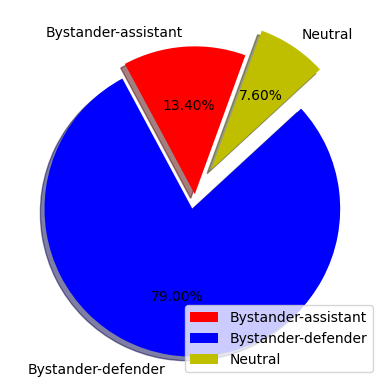

In [13]:
sentiments = ['Bystander-assistant','Bystander-defender', 'Neutral'] 
slices = [(data['sentiment'] == 'Bystander-assistant').sum(), (data['sentiment'] == 'Bystander-defender').sum(), (data['sentiment'] == 'Neutral').sum()]
colors = ['r','b','y'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,
        explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%') 
plt.legend(loc = "lower right")
plt.show() 

In [14]:
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image

def create_wordcloud(text):
     stopwords = set(STOPWORDS)
     wc = WordCloud(background_color='white',
     max_words=3000,
     stopwords=stopwords,
     repeat=True)
     wc.generate(str(text))
     wc.to_file('wc.png')
     print('Word Cloud Saved Successfully')
     path='wc.png'


In [15]:
create_wordcloud(data['processed_tweet'].values)

Word Cloud Saved Successfully


# Divide into number of classes For Finding The probability

In [16]:
n_class = 3
n_tweet = 500

if n_class == 2:
    df_pos = data.copy()[data.sentiment == 'Bystander-defender'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'Bystander-assistant'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = data.copy()[data.sentiment == 'Bystander-defender'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'Bystander-assistant'][:n_tweet]
    df_neu = data.copy()[data.sentiment == 'Neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)


# Dividing The Training And Testing Data To find The Accuracy of Algorithm

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'], test_size=0.33, random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['processed_tweet'] = X_train
df_train['sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['processed_tweet'] = X_test
df_test['sentiment'] = y_test
df_test = df_test.reset_index(drop=True)
df_test

,processed_tweet,sentiment
0,the massive victory of the bharatiya janata pa...,Bystander-defender
1,good,Bystander-defender
2,bow my head in gratitude to the people of assa...,Bystander-defender
3,interview after interview our tamil student wh...,Bystander-defender
4,started following you post reading this awesom...,Bystander-defender
...,...,...
160,congratulation to all karyakartas for massive ...,Bystander-defender
161,mehak para kour yesterday came back kathua fro...,Bystander-defender
162,interview after interview our tamil student wh...,Bystander-defender
163,don want you to accept that either,Bystander-defender


# Applying Naive Bayes Classifier For our Processed Tweet and Sentiment ALbel

In [18]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
class TweetNBClassifier(object):

    def __init__(self, df_train):
        self.df_train = df_train
        self.df_pos = df_train.copy()[df_train.sentiment == 'Bystander-defender']
        self.df_neg = df_train.copy()[df_train.sentiment == 'Bystander-assistant']
        self.df_neu = df_train.copy()[df_train.sentiment == 'Neutral']

    def fit(self):
        Pr_pos = df_pos.shape[0]/self.df_train.shape[0]
        Pr_neg = df_neg.shape[0]/self.df_train.shape[0]
        Pr_neu = df_neu.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.df_pos['processed_tweet'].tolist()).split()
        self.neg_words = ' '.join(self.df_neg['processed_tweet'].tolist()).split()
        self.neu_words = ' '.join(self.df_neu['processed_tweet'].tolist()).split()

        all_words = ' '.join(self.df_train['processed_tweet'].tolist()).split()

        self.vocab = len(Counter(all_words))

        wc_pos = len(' '.join(self.df_pos['processed_tweet'].tolist()).split())
        wc_neg = len(' '.join(self.df_neg['processed_tweet'].tolist()).split())
        wc_neu = len(' '.join(self.df_neu['processed_tweet'].tolist()).split())
        self.word_count = (wc_pos, wc_neg, wc_neu)
        return self


    def predict(self, df_test):
        class_choice = ['Bystander-defender', 'Bystander-assistant', 'Neutral']

        classification = []
        for tweet in df_test['processed_tweet']:
            text = tweet.split()

            val_pos = np.array([])
            val_neg = np.array([])
            val_neu = np.array([])
            for word in text:
                tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                val_pos = np.append(val_pos, tmp_pos)
                val_neg = np.append(val_neg, tmp_neg)
                val_neu = np.append(val_neu, tmp_neu)

            val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
            val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
            val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

            probability = (val_pos, val_neg, val_neu)
            classification.append(class_choice[np.argmax(probability)])
        return classification


    def score(self, feature, target):

        compare = []
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                tmp ='correct'
                compare.append(tmp)
            else:
                tmp ='incorrect'
                compare.append(tmp)
        r = Counter(compare)
        accuracy = r['correct']/(r['correct']+r['incorrect'])
        return accuracy
    
    def score_metrics(self, feature, target):
        accuracy = accuracy_score(target, feature)
        precision = precision_score(target, feature, average='weighted')
        f1 = f1_score(target, feature, average='weighted')
        return accuracy, precision, f1
    
    def score_metrics_without_neutral(self, feature, target):
        # Filter out 'Neutral' instances from both predictions and true labels
        feature_without_neutral = [f for f, t in zip(feature, target) if t != 'Neutral']
        target_without_neutral = [t for t in target if t != 'Neutral']

        accuracy = accuracy_score(target_without_neutral, feature_without_neutral)
        precision = precision_score(target_without_neutral, feature_without_neutral, average='weighted')
        f1 = f1_score(target_without_neutral, feature_without_neutral, average='weighted')
        return accuracy, precision, f1

# Calling Functions to Evaluate the Model 

In [20]:
tnb = TweetNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
score = tnb.score(predict,df_test.sentiment.tolist())
print(score)

0.793939393939394


Naive Bayes Classification Report:
                      precision    recall  f1-score   support

 Bystander-defender       0.93      0.81      0.87       129
Bystander-assistant       0.46      0.78      0.58        23

          micro avg       0.81      0.81      0.81       152
          macro avg       0.70      0.80      0.72       152
       weighted avg       0.86      0.81      0.82       152

Naive Bayes Accuracy: 0.8092105263157895
Naive Bayes Precision: 0.8949477058029691
Naive Bayes F1 Score : 0.8398594485396833


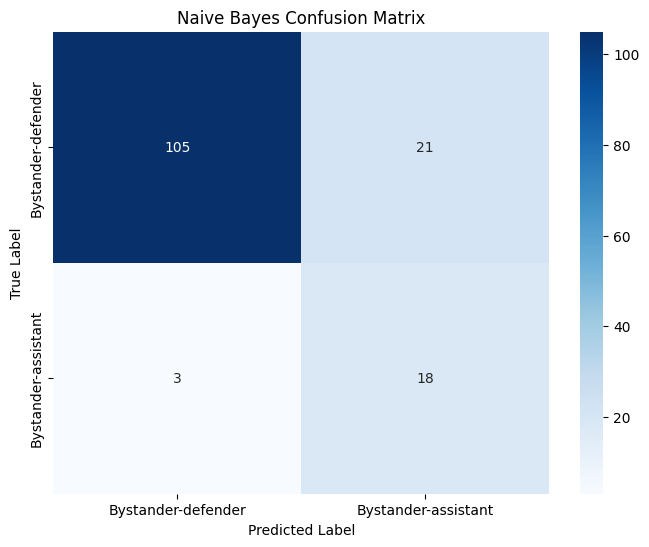

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate metrics and generate classification report without 'Neutral'
accuracy_nb, precision_nb, f1_nb = tnb.score_metrics_without_neutral(predict, df_test.sentiment.tolist())

# Generate and print classification report without 'Neutral'
nb_classification_report = classification_report(df_test.sentiment.tolist(), predict, labels=['Bystander-defender', 'Bystander-assistant'])
print("Naive Bayes Classification Report:\n", nb_classification_report)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes F1 Score :", f1_nb)

# Generate and plot confusion matrix without 'Neutral'
nb_conf_matrix = confusion_matrix(df_test.sentiment.tolist(), predict, labels=['Bystander-defender', 'Bystander-assistant'])
plt.figure(figsize=(8, 6))
unique_classes = ['Bystander-defender', 'Bystander-assistant']
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
# Filter out 'Neutral' instances from both training and testing data
X_train_no_neutral = X_train[y_train != 'Neutral']
y_train_no_neutral = y_train[y_train != 'Neutral']

X_test_no_neutral = X_test[y_test != 'Neutral']
y_test_no_neutral = y_test[y_test != 'Neutral']

Support Vector Machine Classification Report:
                      precision    recall  f1-score   support

Bystander-assistant       0.73      0.35      0.47        23
 Bystander-defender       0.89      0.98      0.93       129

           accuracy                           0.88       152
          macro avg       0.81      0.66      0.70       152
       weighted avg       0.87      0.88      0.86       152

Support Vector Machine Accuracy: 0.881578947368421
Support Vector Machine Precision: 0.8684465031049577
Support Vector Machine F1 Score: 0.863312693498452


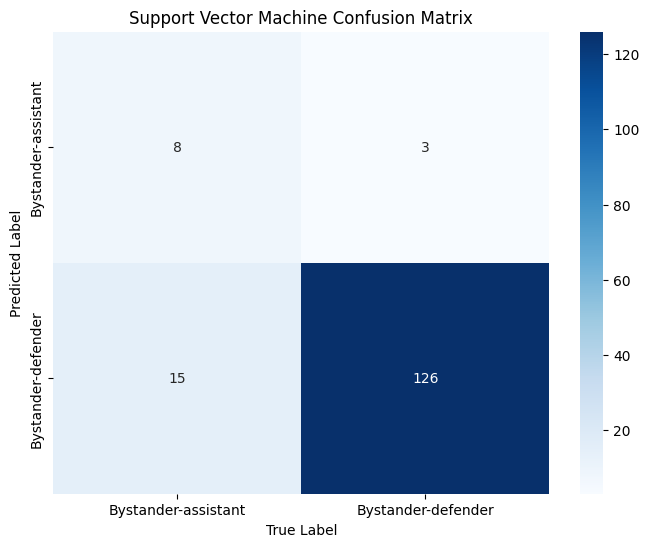

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test defined

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

# Fit the model
svm_model.fit(X_train_no_neutral, y_train_no_neutral)

# Predict
svm_predictions_no_neutral = svm_model.predict(X_test_no_neutral)

# Calculate metrics
svm_accuracy_no_neutral = accuracy_score(y_test_no_neutral, svm_predictions_no_neutral)
svm_precision_no_neutral = precision_score(y_test_no_neutral, svm_predictions_no_neutral, average='weighted')
svm_f1_no_neutral = f1_score(y_test_no_neutral, svm_predictions_no_neutral, average='weighted')

# Generate and print classification report without 'Neutral'
svm_classification_report_no_neutral = classification_report(y_test_no_neutral, svm_predictions_no_neutral)
print("Support Vector Machine Classification Report:\n", svm_classification_report_no_neutral)

print("Support Vector Machine Accuracy:", svm_accuracy_no_neutral)
print("Support Vector Machine Precision:", svm_precision_no_neutral)
print("Support Vector Machine F1 Score:", svm_f1_no_neutral)

# Generate and plot confusion matrix without 'Neutral' horizontally
svm_conf_matrix_no_neutral = confusion_matrix(y_test_no_neutral, svm_predictions_no_neutral)
plt.figure(figsize=(8, 6))
unique_classes_no_neutral = svm_model.classes_[svm_model.classes_ != 'Neutral']
sns.heatmap(svm_conf_matrix_no_neutral.T, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes_no_neutral, yticklabels=unique_classes_no_neutral)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

Random Forest Classification Report:
                      precision    recall  f1-score   support

Bystander-assistant       1.00      0.30      0.47        23
 Bystander-defender       0.89      1.00      0.94       129

           accuracy                           0.89       152
          macro avg       0.94      0.65      0.70       152
       weighted avg       0.91      0.89      0.87       152

Random Forest Accuracy: 0.8947368421052632
Random Forest Precision: 0.9063520871143376
Random Forest F1 Score: 0.8697400435395055


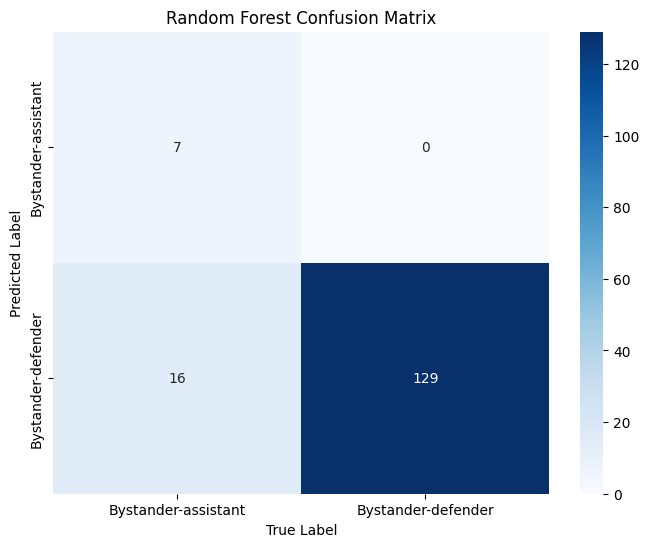

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test defined

# Create a pipeline with CountVectorizer and Random Forest classifier
rf_model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=0))

# Fit the model
rf_model.fit(X_train_no_neutral, y_train_no_neutral)

# Predict
rf_predictions_no_neutral = rf_model.predict(X_test_no_neutral)

# Calculate metrics
rf_accuracy_no_neutral = accuracy_score(y_test_no_neutral, rf_predictions_no_neutral)
rf_precision_no_neutral = precision_score(y_test_no_neutral, rf_predictions_no_neutral, average='weighted')
rf_f1_no_neutral = f1_score(y_test_no_neutral, rf_predictions_no_neutral, average='weighted')

# Generate and print classification report without 'Neutral'
rf_classification_report_no_neutral = classification_report(y_test_no_neutral, rf_predictions_no_neutral)
print("Random Forest Classification Report:\n", rf_classification_report_no_neutral)

print("Random Forest Accuracy:", rf_accuracy_no_neutral)
print("Random Forest Precision:", rf_precision_no_neutral)
print("Random Forest F1 Score:", rf_f1_no_neutral)

# Generate and plot confusion matrix without 'Neutral' horizontally
rf_conf_matrix_no_neutral = confusion_matrix(y_test_no_neutral, rf_predictions_no_neutral)
plt.figure(figsize=(8, 6))
unique_classes_no_neutral = rf_model.classes_[rf_model.classes_ != 'Neutral']
sns.heatmap(rf_conf_matrix_no_neutral.T, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes_no_neutral, yticklabels=unique_classes_no_neutral)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

Gradient Boosting Classification Report:
                      precision    recall  f1-score   support

Bystander-assistant       0.62      0.43      0.51        23
 Bystander-defender       0.90      0.95      0.93       129

           accuracy                           0.88       152
          macro avg       0.76      0.69      0.72       152
       weighted avg       0.86      0.88      0.87       152

Gradient Boosting Accuracy: 0.875
Gradient Boosting Precision: 0.8621323529411766
Gradient Boosting F1 Score: 0.8654329946782776


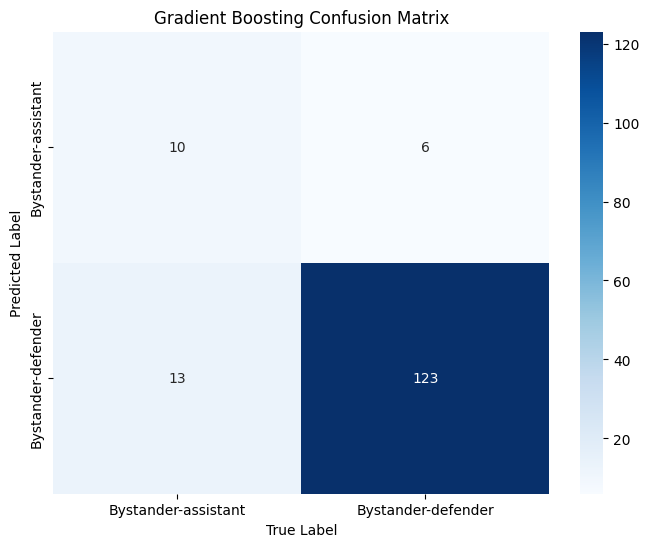

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with 'processed_tweet' and 'sentiment' columns
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'], test_size=0.33, random_state=0)

# Create a pipeline with CountVectorizer and Gradient Boosting classifier
gb_model = make_pipeline(CountVectorizer(), GradientBoostingClassifier(n_estimators=100, random_state=0))

# Fit the model
gb_model.fit(X_train_no_neutral, y_train_no_neutral)

# Predict
gb_predictions_no_neutral = gb_model.predict(X_test_no_neutral)

# Generate and print classification report without 'Neutral'
gb_classification_report_no_neutral = classification_report(y_test_no_neutral, gb_predictions_no_neutral)
print("Gradient Boosting Classification Report:\n", gb_classification_report_no_neutral)

# Calculate metrics without 'Neutral'
gb_accuracy_no_neutral = accuracy_score(y_test_no_neutral, gb_predictions_no_neutral)
gb_precision_no_neutral = precision_score(y_test_no_neutral, gb_predictions_no_neutral, average='weighted')
gb_f1_no_neutral = f1_score(y_test_no_neutral, gb_predictions_no_neutral, average='weighted')

print("Gradient Boosting Accuracy:", gb_accuracy_no_neutral)
print("Gradient Boosting Precision:", gb_precision_no_neutral)
print("Gradient Boosting F1 Score:", gb_f1_no_neutral)

# Generate and plot confusion matrix without 'Neutral' horizontally
gb_conf_matrix_no_neutral = confusion_matrix(y_test_no_neutral, gb_predictions_no_neutral)
plt.figure(figsize=(8, 6))
unique_classes_no_neutral = gb_model.classes_[gb_model.classes_ != 'Neutral']
sns.heatmap(gb_conf_matrix_no_neutral.T, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes_no_neutral, yticklabels=unique_classes_no_neutral)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

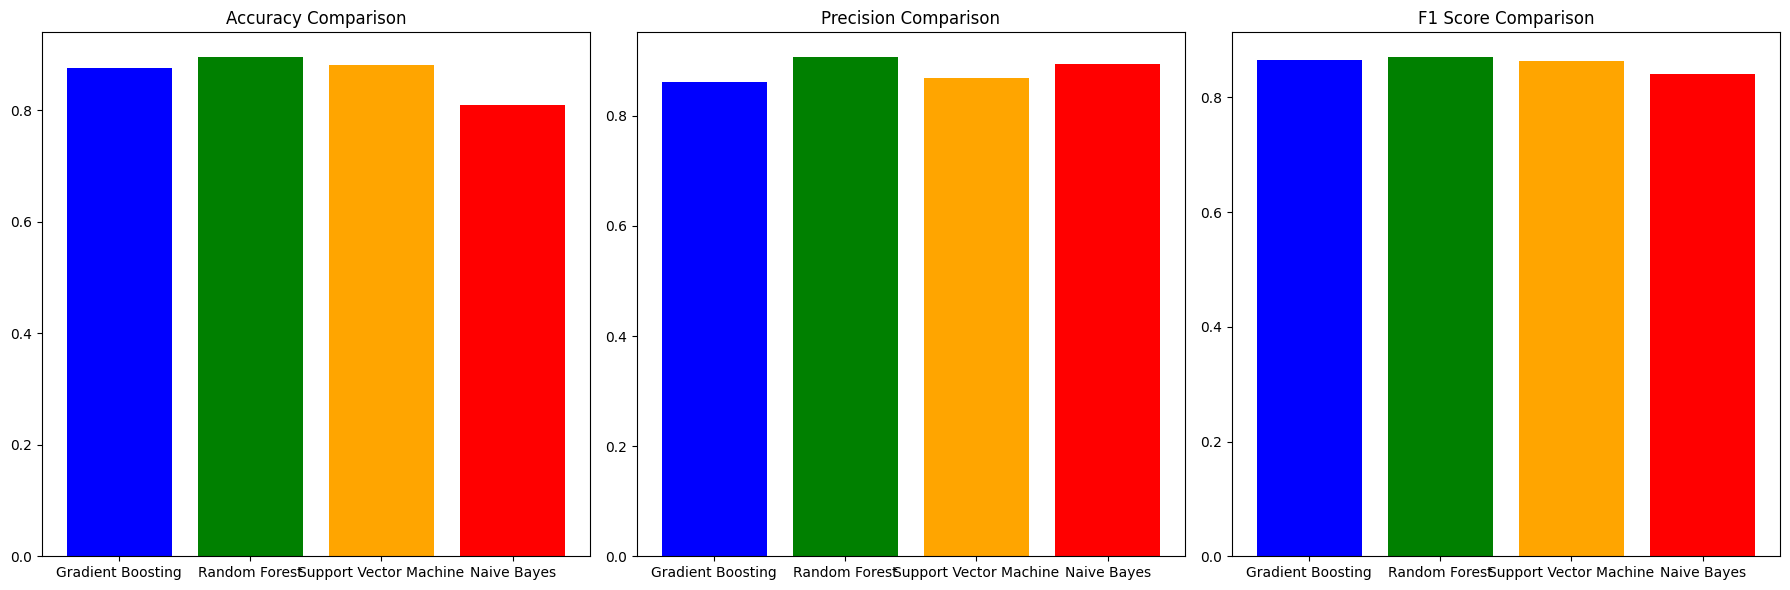

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Results from Gradient Boosting
gb_accuracy = gb_accuracy_no_neutral
gb_precision = gb_precision_no_neutral
gb_f1 = gb_f1_no_neutral

# Results from Random Forest
rf_accuracy = rf_accuracy_no_neutral
rf_precision = rf_precision_no_neutral
rf_f1 = rf_f1_no_neutral

# Results from Support Vector Machine
svm_accuracy = svm_accuracy_no_neutral
svm_precision = svm_precision_no_neutral
svm_f1 = svm_f1_no_neutral

# Results from Naive Bayes
nb_accuracy = accuracy_nb
nb_precision = precision_nb
nb_f1 = f1_nb

# Labels for the algorithms
labels = ['Gradient Boosting', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']

# Accuracy comparison
accuracy_scores = [gb_accuracy, rf_accuracy, svm_accuracy, nb_accuracy]

# Precision comparison
precision_scores = [gb_precision, rf_precision, svm_precision, nb_precision]

# F1 Score comparison
f1_scores = [gb_f1, rf_f1, svm_f1, nb_f1]

# Plotting the bar chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar chart for Accuracy
axes[0].bar(labels, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
axes[0].set_title('Accuracy Comparison')

# Bar chart for Precision
axes[1].bar(labels, precision_scores, color=['blue', 'green', 'orange', 'red'])
axes[1].set_title('Precision Comparison')

# Bar chart for F1 Score
axes[2].bar(labels, f1_scores, color=['blue', 'green', 'orange', 'red'])
axes[2].set_title('F1 Score Comparison')

plt.tight_layout()
plt.show()
